In [71]:
import yfinance as yf
import pandas as pd
import numpy as np
id_stocks = 'BUMI ANTM PGAS PTBA ITMG Adro Inco Bsde Ctra Asri Smgr Adhi Bmtr Kras Wika Wsbp Wskt Untr GIAA'
id_stocks=id_stocks.split()
id_stocks = [i.upper()+'.JK' for i in id_stocks]

In [59]:
jkse = yf.Ticker('^JKSE')
jkse = jkse.history(period="MAX")['Close']
ret = pd.DataFrame(index = jkse.index,columns=id_stocks)

In [60]:
for i in id_stocks: 
    cur = yf.Ticker(i)
    ret[i] = cur.history(period="MAX")['Close'].pct_change()[1:]
ret = ret[4000:]

In [79]:
ret = ret.join(jkse.pct_change()[1:]).rename({'Close':'JKSE'})

ValueError: columns overlap but no suffix specified: Index(['Close'], dtype='object')

In [67]:
daily_ret = (ret.fillna(method='bfill')

In [80]:
ret

,BUMI.JK,ANTM.JK,PGAS.JK,PTBA.JK,ITMG.JK,ADRO.JK,INCO.JK,BSDE.JK,CTRA.JK,ASRI.JK,SMGR.JK,ADHI.JK,BMTR.JK,KRAS.JK,WIKA.JK,WSBP.JK,WSKT.JK,UNTR.JK,GIAA.JK,Close
Date,,,,,,,,,,,,,,,,,,,,
2006-07-28,-0.012658,NaN,0.031674,-0.022388,NaN,NaN,-0.002506,NaN,-0.011111,NaN,0.026210,-0.032257,-0.018692,NaN,NaN,NaN,NaN,-0.018018,NaN,0.005124
2006-07-31,0.064103,NaN,0.035088,0.000000,NaN,NaN,0.002513,NaN,0.033708,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.027522,NaN,0.010647
2006-08-01,0.000000,NaN,0.016949,0.015267,NaN,NaN,0.022556,NaN,0.032610,NaN,-0.001965,0.016667,0.047619,NaN,NaN,NaN,NaN,0.026787,NaN,0.014829
2006-08-02,0.000000,NaN,0.004167,0.015037,NaN,NaN,0.002451,NaN,0.021053,NaN,-0.015748,0.016392,0.027273,NaN,NaN,NaN,NaN,0.008694,NaN,0.016528
2006-08-03,-0.024096,NaN,-0.012448,0.029630,NaN,NaN,-0.014670,NaN,-0.051548,NaN,0.012000,-0.016128,-0.035398,NaN,NaN,NaN,NaN,0.000000,NaN,-0.010506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-18,0.000000,0.042017,0.074803,0.000000,0.005464,0.008475,0.019651,-0.009217,-0.026596,0.015707,0.015945,0.010989,-0.015504,0.099502,-0.003413,-0.005076,0.019900,-0.002375,0.187879,0.004987
2020-11-19,0.000000,-0.004032,-0.007326,0.056872,0.116848,0.042017,0.004283,0.004651,-0.005464,0.298969,0.000000,0.005435,0.007874,-0.013575,0.006849,0.040816,0.034146,0.023810,-0.005102,0.006575
2020-11-20,0.000000,-0.020243,0.036900,-0.017937,-0.012165,-0.020161,-0.027719,-0.018519,-0.016484,-0.063492,0.017937,-0.005405,-0.031250,-0.009174,-0.030612,0.049020,-0.033019,-0.009302,0.010256,-0.004005


In [75]:
daily_cap = np.cumprod(daily_ret)

Text(0.5, 1.0, 'UNTR vs. JKSE')

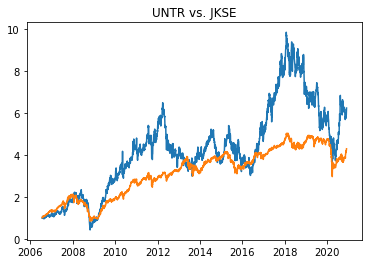

In [86]:
plt.plot(daily_cap[['UNTR.JK','Close']])
plt.title('UNTR vs. JKSE')

In [108]:
np.cumprod((daily_ret[['BUMI.JK','Close']].iloc[-1000:]))

,BUMI.JK,Close
Date,,
2016-10-11,0.938272,1.003949
2016-10-12,0.950617,1.000706
2016-10-13,0.938272,0.996189
2016-10-14,0.938272,1.007286
2016-10-17,1.012346,1.009229
...,...,...
2020-11-18,0.617284,1.036721
2020-11-19,0.617284,1.043538
2020-11-20,0.617284,1.039358


Text(0.5, 1.0, 'BUMI.JK vs UNTR.JK')

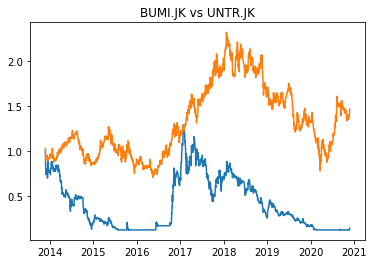

In [126]:
plt.plot(np.cumprod(daily_ret[['BUMI.JK','UNTR.JK']].iloc[-1700:]))
plt.title('BUMI.JK vs UNTR.JK')

Text(0.5, 1.0, 'BUMI vs JKSE')

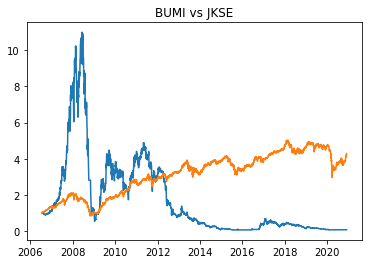

In [87]:
import matplotlib.pyplot as plt

plt.plot(daily_cap[['BUMI.JK','Close']])
plt.title('BUMI vs JKSE')

In [122]:
import seabort as sns
daily_cap.corr()

,BUMI.JK,ANTM.JK,PGAS.JK,PTBA.JK,ITMG.JK,ADRO.JK,INCO.JK,BSDE.JK,CTRA.JK,ASRI.JK,SMGR.JK,ADHI.JK,BMTR.JK,KRAS.JK,WIKA.JK,WSBP.JK,WSKT.JK,UNTR.JK,GIAA.JK,Close
BUMI.JK,1.000000,0.603240,-0.201263,0.128682,0.076953,0.259248,0.598356,-0.611123,-0.659878,-0.367634,-0.569518,-0.526870,-0.170657,0.847641,-0.701172,0.750959,-0.234733,-0.437091,0.384511,-0.591706
ANTM.JK,0.603240,1.000000,0.436866,0.018634,0.631042,0.197610,0.358655,-0.138174,-0.210911,0.457442,0.549452,-0.109140,0.472305,0.455435,-0.293423,0.275490,-0.311154,-0.061336,0.551625,-0.039064
PGAS.JK,-0.201263,0.436866,1.000000,-0.200820,0.248410,-0.248031,-0.061154,0.423433,0.396541,0.727300,0.685490,0.510010,0.763801,0.119152,0.396604,0.876003,-0.420351,0.107080,0.559664,0.302020
PTBA.JK,0.128682,0.018634,-0.200820,1.000000,-0.176577,-0.065836,0.026496,-0.307250,-0.225961,-0.256549,-0.324022,-0.127901,-0.092234,-0.349940,-0.253032,-0.054592,0.357535,-0.285909,-0.540431,-0.306231
ITMG.JK,0.076953,0.631042,0.248410,-0.176577,1.000000,0.724599,0.292817,0.044550,-0.058982,0.327528,0.316442,-0.059746,0.207200,0.505200,-0.157218,0.370017,-0.008580,0.532719,0.228039,0.292958
ADRO.JK,0.259248,0.197610,-0.248031,-0.065836,0.724599,1.000000,0.622596,-0.003915,-0.062031,-0.138968,-0.024425,-0.170656,-0.338623,0.428354,-0.201516,0.426110,0.434342,0.663331,-0.233074,0.329230
INCO.JK,0.598356,0.358655,-0.061154,0.026496,0.292817,0.622596,1.000000,-0.141982,-0.247572,-0.224399,-0.167592,-0.167780,-0.095232,0.254938,-0.276138,-0.219987,-0.036378,-0.005813,-0.069733,-0.085201
BSDE.JK,-0.611123,-0.138174,0.423433,-0.307250,0.044550,-0.003915,-0.141982,1.000000,0.946959,0.696217,0.709309,0.920846,0.470516,-0.226765,0.898384,0.895218,0.559165,0.513848,0.016844,0.784915
CTRA.JK,-0.659878,-0.210911,0.396541,-0.225961,-0.058982,-0.062031,-0.247572,0.946959,1.000000,0.607862,0.744394,0.899761,0.338457,-0.432780,0.946920,0.848746,0.645825,0.603912,-0.153702,0.848218
ASRI.JK,-0.367634,0.457442,0.727300,-0.256549,0.327528,-0.138968,-0.224399,0.696217,0.607862,1.000000,0.767103,0.667216,0.849830,0.119195,0.562143,0.908132,-0.239189,0.232424,0.610044,0.464657
